In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import glob
import os

# Path to the folder containing the CSV files
directory = "D:/RUG/Term 3/ScientificVisualization/user-modelling-project-apples-2/experiment" # i know my directory is bit fcked :D

# Use glob to get a list of all files matching the pattern 'subject-#.csv'
csv_files = glob.glob(os.path.join(directory, "subject-*.csv"))

# Filter out files that contain '_recall' in their names
csv_files = [file for file in csv_files if '_recall' not in os.path.basename(file)]
csv_files = [file for file in csv_files if 'pandasRecall' not in os.path.basename(file)]
# Initialize an empty list to store individual DataFrames
dfs = []

# Loop over the files
for file in csv_files:
    print(file)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Extract the subject number from the file name (assuming format: 'subject-#.csv')
    subject_number = os.path.basename(file).split('-')[1].split('.')[0]

    # Add a new column for the subject number
    df['subject'] = subject_number

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

D:/RUG/Term 3/ScientificVisualization/user-modelling-project-apples-2/experiment\subject-0.csv
D:/RUG/Term 3/ScientificVisualization/user-modelling-project-apples-2/experiment\subject-1.csv
D:/RUG/Term 3/ScientificVisualization/user-modelling-project-apples-2/experiment\subject-10.csv
D:/RUG/Term 3/ScientificVisualization/user-modelling-project-apples-2/experiment\subject-11.csv
D:/RUG/Term 3/ScientificVisualization/user-modelling-project-apples-2/experiment\subject-12.csv
D:/RUG/Term 3/ScientificVisualization/user-modelling-project-apples-2/experiment\subject-13.csv
D:/RUG/Term 3/ScientificVisualization/user-modelling-project-apples-2/experiment\subject-14.csv
D:/RUG/Term 3/ScientificVisualization/user-modelling-project-apples-2/experiment\subject-2.csv
D:/RUG/Term 3/ScientificVisualization/user-modelling-project-apples-2/experiment\subject-3.csv


In [3]:
combined_df.to_csv("combined_data.csv")

In [4]:
combined_df

,trial,start_time,rt,correct,time_bar,keyboard_response,new,on_time,expected_rt,time_bar_visible,fact_id,question,answer,alpha,subject
0,1,118820.13440004084,4883.936600002926,False,15000.0,NaN,True,True,inf,True,50,ujuzi,knowledge,0.3,0
1,2,126047.07490000874,1646.066899993457,True,7217.064756936508,knowledge,False,True,2110.032378468254,True,50,ujuzi,knowledge,0.3,0
2,3,132362.35030001262,4523.2601999887265,False,15000.0,NaN,True,True,inf,True,54,degaga,glasses,0.3,0
3,4,139224.719299993,1297.6233000517823,True,6495.2832999710945,glasses,False,True,2082.1416499855472,True,54,degaga,glasses,0.3,0
4,5,144304.73080003867,4968.492799962405,False,15000.0,NaN,True,True,inf,True,22,kazi,work,0.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,37,775908.472900046,5449.62900003884,False,15000.0,NaN,True,True,inf,True,46,kofia,hat,0.3,3
810,38,783703.6204000469,3157.001500017941,False,15000.0,NaN,True,True,inf,True,71,maziwa,milk,0.3,3
811,39,789201.9464999903,1368.4709999943152,True,5945.31840454242,hat,False,True,2473.15920227121,True,46,kofia,hat,0.3,3
812,40,793400.6164000602,778.7601000163704,True,5885.858844162206,milk,False,True,2276.929422081103,True,71,maziwa,milk,0.3,3


# Starting with some measures we can plot
What do we want to visualise/look at?
How many items did participants see in either condition?
How accurate were the participants?
What is the distribution of response times from the 2 blocks? (Boxplot)
How much did the timebar length change? Average min max again boxplot?

In [5]:

# removing the inf rt cases
combined_df = combined_df[combined_df['rt']!='inf']

In [6]:
# Splitting into Timbar and Control Group
df_timebar = combined_df[combined_df["time_bar_visible"]=='True']
df_control = combined_df[combined_df["time_bar_visible"]=='False']


In [7]:
# Calculating Averages maybe boxplots could be nice.
# First thing is removing initial presentations as these dont have a timebar
df_timebar.loc[:,'rt'] = pd.to_numeric(df_timebar['rt'], errors='coerce')
df_control.loc[:,'rt'] = pd.to_numeric(df_control['rt'], errors='coerce')

nr_new_timebar = len(df_timebar[df_timebar['new'] == 'True'])
nr_new_control = len(df_control[df_control['new'] == 'True'])

df_timebar = df_timebar[df_timebar['new'] == 'False']
df_control = df_control[df_control['new'] == 'False']

mean_rt_control = df_control['rt'].mean()
mean_rt_timebar = df_timebar['rt'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


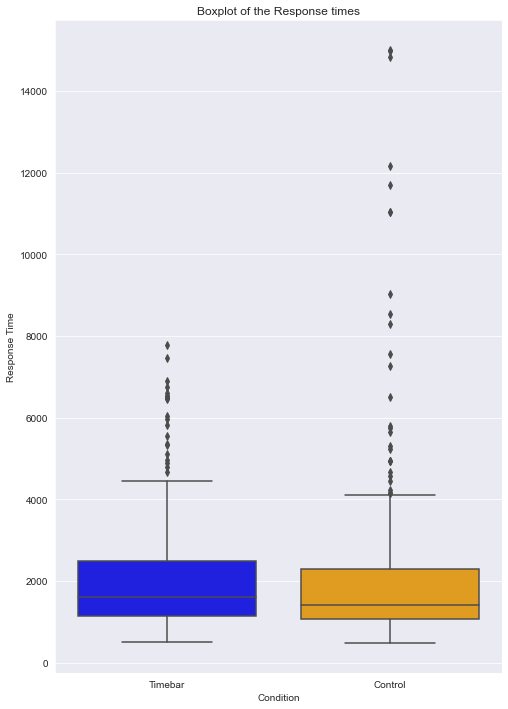

In [43]:
combined_df = pd.DataFrame({
    'Response Time': pd.concat([df_timebar.loc[:,'rt'], df_control.loc[:,'rt']], axis=0),
    'Condition': ['Timebar'] * len(df_timebar.loc[:,'rt']) + ['Control'] * len(df_control.loc[:,'rt'])
})

# Plotting with seaborn
plt.figure(figsize=(8, 12))
my_pal = {'Timebar':"blue", 'Control':'orange'}
sns.boxplot(x='Condition', y='Response Time', data=combined_df, palette=my_pal)
plt.title('Boxplot of the Response times')
plt.savefig("figures/rt_comparison_boxplot.png")
plt.show()

In [11]:
print("Number of new items presented in the Timbear Condition:",nr_new_timebar)
print("Number of new items presented in the Control Condition:",nr_new_control)

Number of new items presented in the Timbear Condition: 118
Number of new items presented in the Control Condition: 125


In [14]:
# Accuracy
df_timebar_correct = len(df_timebar[df_timebar['correct'] == "True"])
df_timebar_incorrect = len(df_timebar[df_timebar['correct'] == "False"])

In [19]:
print(df_timebar_correct,df_timebar_incorrect)

195 77


In [21]:
acc_timebar = df_timebar_correct/(df_timebar_correct+df_timebar_incorrect)
acc_timebar

0.7169117647058824

In [17]:
df_control_correct = len(df_control[df_control['correct'] == "True"])
df_control_incorrect = len(df_control[df_control['correct'] == "False"])

In [18]:
print(df_control_correct, df_control_incorrect)

213 46


In [23]:
acc_control = df_control_correct/(df_control_correct+df_control_incorrect)
acc_control

0.8223938223938224

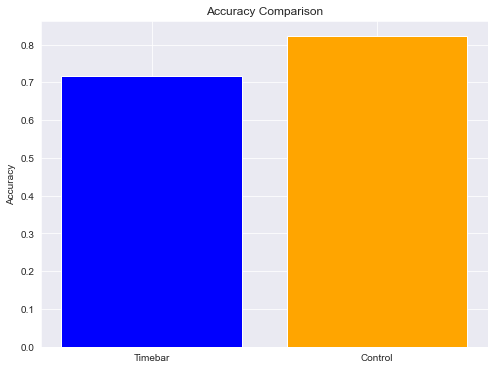

In [36]:
plt.figure(figsize=(8, 6))
plt.bar(['Timebar', 'Control'], [acc_timebar,acc_control], color=['blue', 'orange'])

# Adding title and labels
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

plt.savefig("figures/accuracy_comparison.png")
# Show the plot
plt.show()

In [44]:
df_timebar

,trial,start_time,rt,correct,time_bar,keyboard_response,new,on_time,expected_rt,time_bar_visible,fact_id,question,answer,alpha,subject
1,2,126047.07490000874,1646.0669,True,7217.064756936508,knowledge,False,True,2110.032378468254,True,50,ujuzi,knowledge,0.3,0
3,4,139224.719299993,1297.6233,True,6495.2832999710945,glasses,False,True,2082.1416499855472,True,54,degaga,glasses,0.3,0
6,7,159633.16710002255,6491.9515,False,6468.065861636537,NaN,False,False,2568.0329308182686,True,22,kazi,work,0.3,0
7,8,168510.56409999728,3845.6938,True,6935.171546161445,chair,False,True,2635.0857730807224,True,43,kiti,chair,0.3,0
8,9,175891.06029999675,2028.5119,True,7784.419122308574,knowledge,False,True,2393.709561154287,True,50,ujuzi,knowledge,0.25117187500000004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,35,765097.149600042,1611.7882,False,7447.252503789967,scissor,False,True,2391.6262518949834,True,45,chanjo,scissors,0.44843749999999993,3
808,36,770377.5406000204,2612.9868,False,5908.9526648426545,door,False,True,2454.9763324213272,True,40,kitanda,bed,0.303125,3
811,39,789201.9464999903,1368.4710,True,5945.31840454242,hat,False,True,2473.15920227121,True,46,kofia,hat,0.3,3
812,40,793400.6164000602,778.7601,True,5885.858844162206,milk,False,True,2276.929422081103,True,71,maziwa,milk,0.3,3
